In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


In [ ]:
file_path = '/content/drive/MyDrive/MACHINE LEARNING/IRIS.csv'
data = pd.read_csv(file_path)

In [ ]:
X = data.iloc[:, :-1].values
y_true = data.iloc[:, -1].values
feature_names = data.columns[:-1]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
sil_scores = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sil = silhouette_score(X_scaled, kmeans.labels_)
    sil_scores.append(sil)
best_k = K[np.argmax(sil_scores)]
print(f"Best k based on silhouette score: {best_k}")


Best k based on silhouette score: 2


In [ ]:
final_kmeans = KMeans(n_clusters=best_k, random_state=42)
final_kmeans.fit(X_scaled)
labels = final_kmeans.labels_


In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
centers_pca = pca.transform(final_kmeans.cluster_centers_)


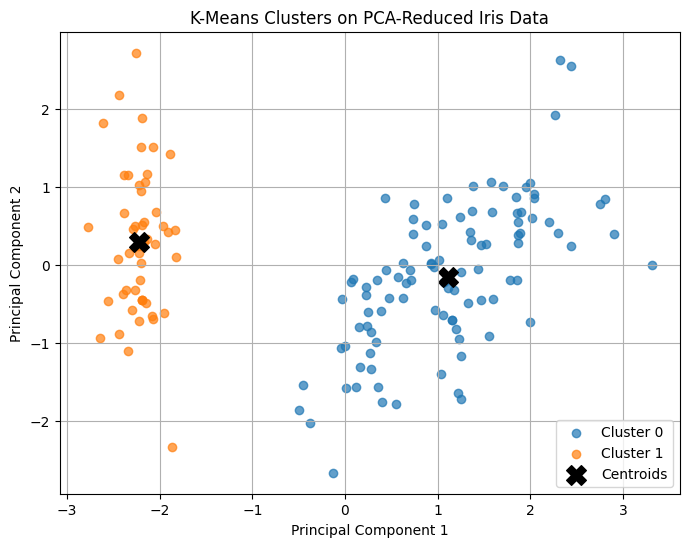

In [ ]:
plt.figure(figsize=(8,6))
for cluster_id in range(best_k):
  plt.scatter(
      X_pca[labels == cluster_id, 0],
      X_pca[labels == cluster_id, 1],
      label=f'Cluster {cluster_id}',
      alpha=0.7
  )
plt.scatter(
      centers_pca[:, 0], centers_pca[:, 1],
      c='black', s=200, marker='X', label='Centroids'
)
plt.title("K-Means Clusters on PCA-Reduced Iris Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
cluster_sizes = np.bincount(labels)
print("\n Cluster sizes:", cluster_sizes)
comparison = pd.crosstab(y_true, labels, rownames=['True Species'], colnames=['Cluster'])
print("\n Cluster mapping to true species:\n")
print(comparison)



 Cluster sizes: [100  50]

 Cluster mapping to true species:

Cluster           0   1
True Species           
Iris-setosa       0  50
Iris-versicolor  50   0
Iris-virginica   50   0


In [ ]:
data['Cluster'] = labels
print("\n📄 Sample of dataset with cluster labels:\n")
print(data.head())


📄 Sample of dataset with cluster labels:

   sepal_length  sepal_width  petal_length  petal_width      species  Cluster
0           5.1          3.5           1.4          0.2  Iris-setosa        1
1           4.9          3.0           1.4          0.2  Iris-setosa        1
2           4.7          3.2           1.3          0.2  Iris-setosa        1
3           4.6          3.1           1.5          0.2  Iris-setosa        1
4           5.0          3.6           1.4          0.2  Iris-setosa        1
